# Investigating characteristics of movies using IMDB dataset.
Apr 27, 2018

<img src="./dataset-cover.png" width="100%">


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


After briefly going through the IMDB movie dataset, one can start to notice some correlations or trends between various characterstics of the movie. The pertinant business question that any Data Analyst would ask when browsing through this data set is to find out what <b> characterstics of movies produce the highest revenue. </b>This investigation and reaserch would help the film industry to work on those characterstics that would generate the highest revenue and by extension increase the movies popularity 

It is due to these above mentioned reasons, that I have decided to keep one major overaching question that would drive the entire investigation and from which other sub-questions and trends would be discovered. 

The focus of our investigation would revolve around 
><b>"What characterstics and traits of a movie generate higher revenue". 
Is their a positive correlation between one characterstic and revenue and can one conclude that this correlation might also be defined as causation? </b>

From this other subquestions can be derived and various other trends explored for example:
> <b>1.</b> Does the budget have a direct correlation with the revenue produce. Our normal understanding would be that the higher the investment, the greater the revenue that shall be generated. We shall use the data to either support or disprove this statement.
<br>
<br>
<b>2.</b> Do any other characterstics support any other co-relation either positive or negative for high revenue? Our further exploratory analyis would lead us to ask more questions. 
<br>
> The other significatiant investigation we shall be doing is understanding trends within the dataset independent of one another to come to conclusions. Whether certain trends show a decline in a particular characterstic or help increase it. 


In [2]:
# Importing the important libraries that we shall use in this investigation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import matplotlib
sns.set(style="ticks", color_codes=True)


<a id='wrangling'></a>
## Data Wrangling


### General Observations
> 1. Too many null(or '0' values in the budget_adj and revenue_adj coloumn. We cannot take weighted average as almost half of the data is missing so shall lead to inaccurate results.
<br>
>2. release_date, revenue_adj, budget_adj not in the correct datatype. 
<br>
>3. Results show one duplicated values.
<br>
>4. Corrupt values found in 'directors' coloumn. 
<br>
>5. Cast, Genre, production_companies contain numerous values per cell delimite by '|'. We might need to work on a mechanism to extract them

In [3]:
#Load dataset 
# Original Dataset from https://www.kaggle.com/tmdb/tmdb-movie-metadata
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#Data wranging. Lets investigate the data. 

#df.describe()
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#I saw some zeros when browsing the data. Let me see how many they are reandomly
#df['budget_adj'].head(80)
#df['revenue'].head(60)
df.head(4)


id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  

[4 rows x 21 columns]

In [6]:
# Below shows significant amount of missing values. 
print('Count of missing values(zeros) in budget_adj colm')
df[df['budget_adj'] == 0].count()
#df[df['revenue_adj'] == 0].count()

Count of missing values(zeros) in budget_adj colm


id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

In [7]:
#Search for missing values
#df.duplicated().sum() 
# only one duplicate value

### Data Cleaning
> We'll clean and extract the relavent data over here. However, since priminarly investigations show that certain coloums(e.g revenue, budget) have a high amount of null(or '0'/Zero values). <em> Removing them in the earlier stage would significantly reduce the size of the dataset therefore making whatever conclusions we draw less credible. </em> We shall therfore decide to remove them(missing values) accordingly to the needs of the questions/exploratory analysis we do. <br><br>
> <b>1. </b> Removing the following coloumns: 
 <br>
 >><tab> </tab> a. Removing budget and revenue coloumns since 'revenue_adj' and 'budget_adj' is more appropriate since they take into consideration inflation.<br>
 >>b. Dropping the following coloumns since we do not find them relavent to the dataset. We shall keep the 'id' coloumn as a unique identifier for the row. 
 [imdb_id, homepage, tagline, overview]<br>

>2. Changing the type of the following coloumn.
<br> - a. release date to data type

> 3. Removing duplicate (NaN) rows from the dataframe

<b> Note that we shall further clean the dataset when we further investigate the dataset. Cleaning or removing values right now will cause a significant decrease in data </b>

In [8]:
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   
1      ...       An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

In [9]:
# After discussing the structure of the data and any problems that need to be cleaned, 
# perform those cleaning steps in the second part of this section.
# Removing budget and renvuue since revenue_adj and budget_adj is more appropriate since it considers inflation 
df.drop(['imdb_id','budget', 'revenue', 'homepage'], axis=1, inplace=True)

In [10]:
#renaming to more descriptive coloumns.
df.rename(index=str, columns={"budget_adj": "total_budget", "revenue_adj": "total_revenue"}, inplace=True)
#changing type of date
df['release_date'] = pd.to_datetime(df['release_date'])
df.head(2)

id  popularity      original_title  \
0  135397   32.985763      Jurassic World   
1   76341   28.419936  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

              tagline                                           keywords  \
0   The park is open.  monster|dna|tyrannosaurus rex|velociraptor|island   
1  What a Lovely Day.   future|chase|post-apocalyptic|dystopia|australia   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   vote_average  release_year  total_budget  total_revenue  
0           6.5          2015  1.379999e+08   1.392446e+09  
1           7.1          2015  1.379999e+08   3.481613e+08

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
total_budget            10866 non-null float64
total_revenue           10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(8)
memory usage: 1.5+ MB


In [12]:
#removing duplicate values
x = df.duplicated().sum()
print("No of Duplicate Values", x)
df.drop_duplicates(inplace=True)
y = df.duplicated().sum()
print("No of Duplicate Values after cleaning", y)

No of Duplicate Values 1
No of Duplicate Values after cleaning 0


<a id='eda'></a>
## Exploratory Data Analysis

#### Research Question 1: Are there any features/properties in the data which are correlated to or effect revenue?
First make a copy of the original cleaned dataframe and perform changes with regards to this question only on this dataframe so that the original remains unaffected. <br>
Cleaning data - and removing all those values which are empty in both total_revenue and total_budget. 
The removal of values reduces the dataset to 50% therefore one can question the crediblity of the analysis. 


In [13]:
# Copy the dataframe so that the main dataframe remains unaffected
df_q2 = df.copy(deep=True)


In [14]:
# Cleaning data - and removing all those values which are empty in both revenue and budget. 
# The removal of values reduces the dataset to 50% therefore one can question the crediblity of the analysis. 

df_q2 = df_q2[df_q2['total_revenue'] != 0]
df_q2 = df_q2[df_q2['total_budget'] != 0]
#check the data
df_q2.head(2)

id  popularity      original_title  \
0  135397   32.985763      Jurassic World   
1   76341   28.419936  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

              tagline                                           keywords  \
0   The park is open.  monster|dna|tyrannosaurus rex|velociraptor|island   
1  What a Lovely Day.   future|chase|post-apocalyptic|dystopia|australia   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   vote_average  release_year  total_budget  total_revenue  
0           6.5          2015  1.379999e+08   1.392446e+09  
1           7.1          2015  1.379999e+08   3.481613e+08

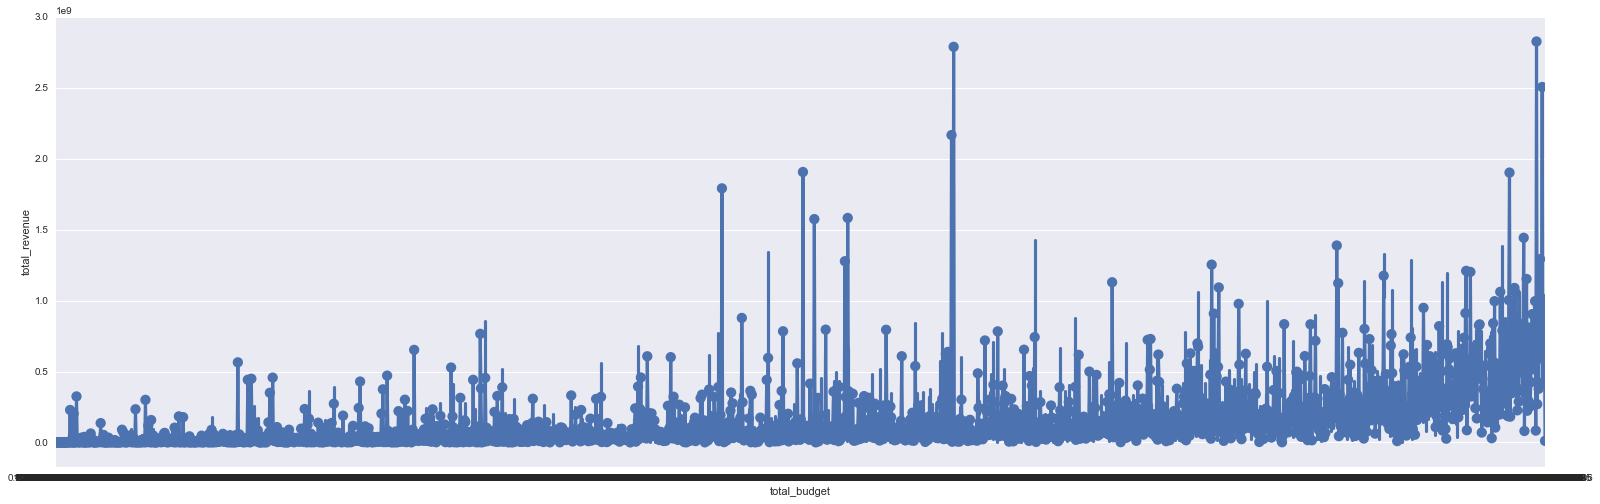

In [216]:
#Plot of budget and revenue
sns.pointplot(x="total_budget", y="total_revenue", data=df_q2);

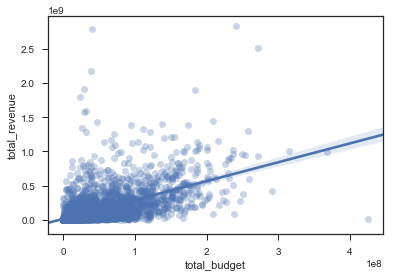

In [16]:
#Scatter plot of budget and revenue, shows better correlation
sns.regplot(x="total_budget", y="total_revenue", data=df_q2, scatter_kws={'alpha':0.3});

Plot the graph between budget and revenue. The graph/scatter plot shows that both <b>[1] the budget and revenue are positivly correlated </b>. As the budget increases the average revenue of a movie also increases. 

<b> Q1 - b) </b> Similary lets see if there is any relationship between movie duration and revenue?

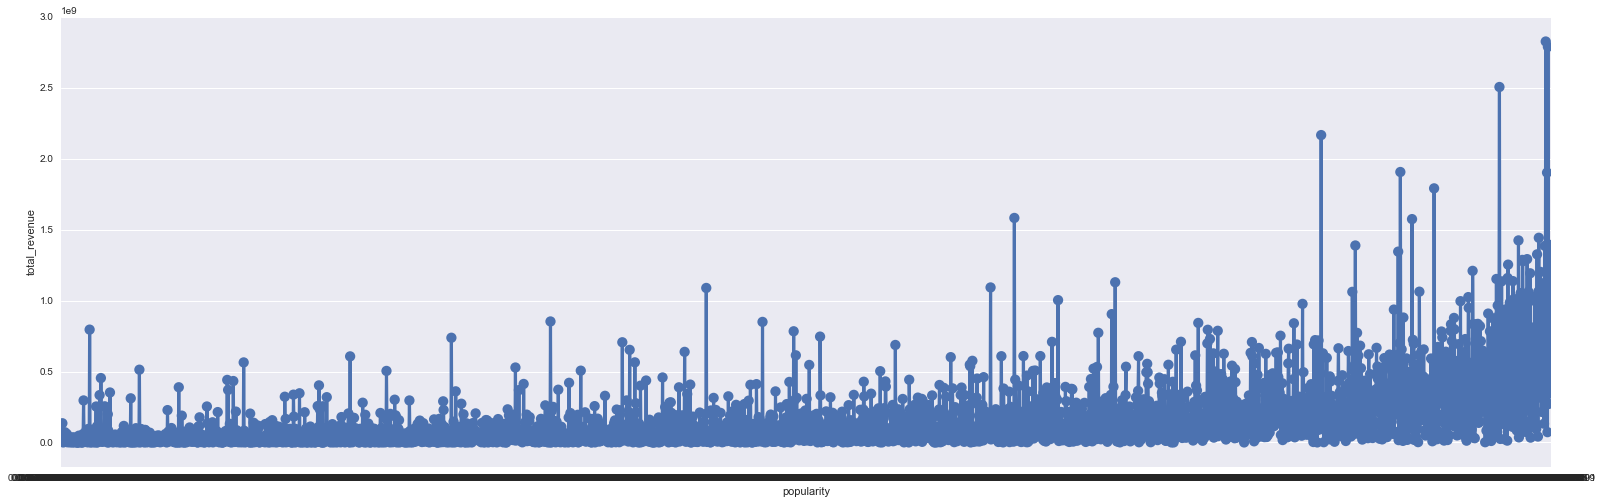

In [135]:
# Graph between populaity and revenue shows that there isn't any correlation betweeen these two values
#matplotlib.pyplot.scatter(df_q2['popularity'] ,df_q2['total_revenue']);
#matplotlib.pyplot.xlabel("Popularity")
#matplotlib.pyplot.ylabel("Revenue");
sns.pointplot(x="popularity", y="total_revenue", data=df_q2);

Lets remove the outliers present in our data.

In [217]:
#clear outliers
df_q2_removeOutliers = df_q2[df_q2['popularity'] < 15]

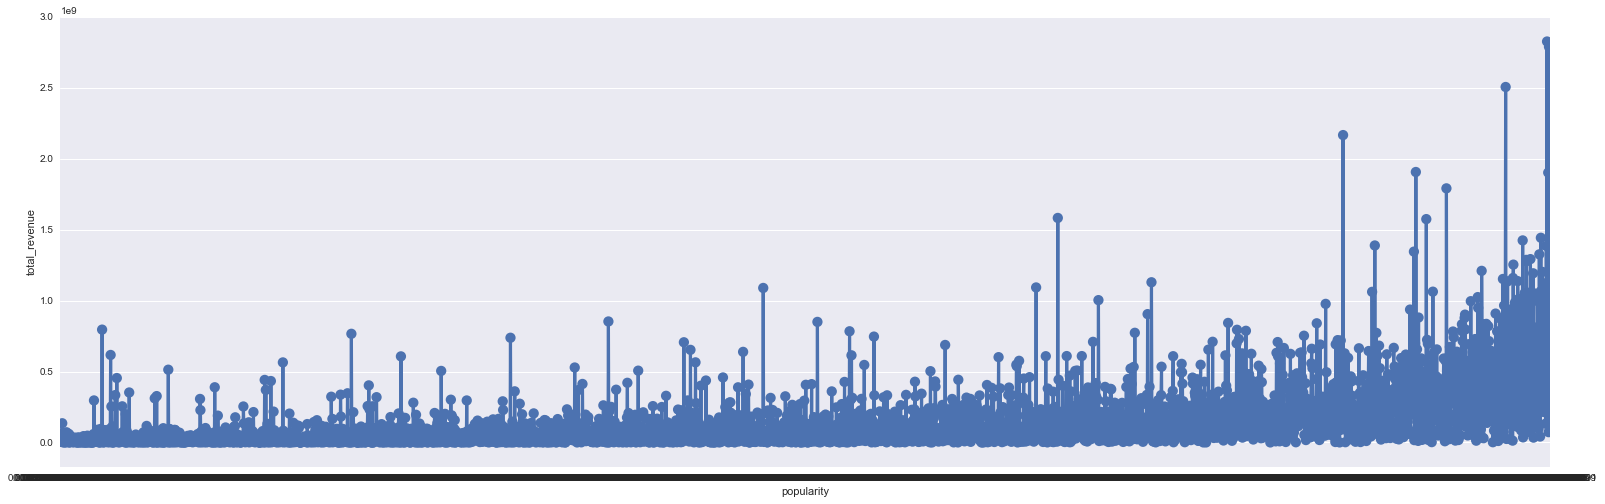

In [218]:
#matplotlib.pyplot.scatter(df_q2_removeOutliers['popularity'] ,df_q2_removeOutliers['total_revenue']);
#matplotlib.pyplot.xlabel("Popularity")
#matplotlib.pyplot.ylabel("Revenue");
sns.pointplot(x="popularity", y="total_revenue", data=df_q2_removeOutliers);

The above graph shows that there is <b> a significant relationship between popularity and revenue </b> The more popularity a particular movie has the more revenue it usually tends to produce.

<b> Q1 - c) </b> Reputed directors traditionally do have a impact on the movie revenue. Lets first find out the directors which directed the most movies and then compare the revenues made by the movies they directed. We will find out whether a particular director directing a movie has any(if any) significant impact on the revenues. 

In [219]:
# Drop all null values. 
df_q2 = df_q2.dropna()
# Sieve through the dataset by using a group by function and find out the list of directors which produced the most
# movies in descending order. Since the number of directors in this dataset is huge, we shall only consider the top few who 
#have directed a greater number of movies. 
top_actors = (df_q2.groupby('director')['original_title'].count()).sort_values(ascending=False)

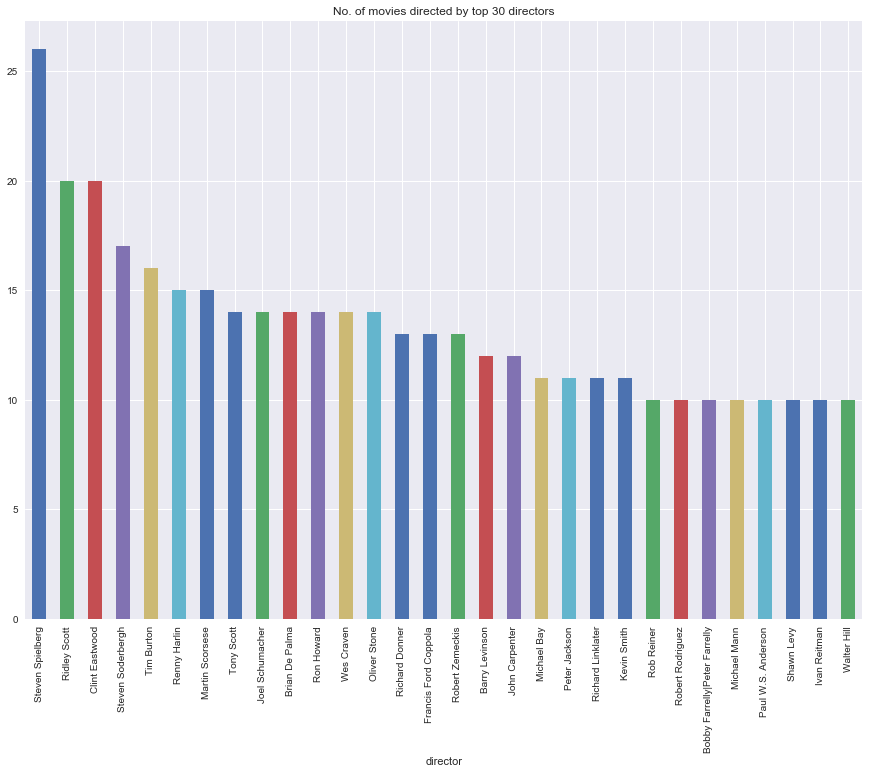

In [220]:
#List of top directors
top_actors[:30].plot(kind='bar', figsize=(15,11), title='No. of movies directed by top 30 directors').yaxis.label.set_visible(False);

<b> One can observe from the above graph that Steven Spielberg and Ridley Scott and Client Eastwood have directed a marked greater number of movies than the rest. </b>
<hr>

The below code first sieves through dataframe and extracts all those rows which contains the names of the top 21 directors. The for loop extracts the row from the dataframe and keeps on appended it to the df_topDirectors dataframe. 

In [221]:
#Now create a new dataframe which only contain the rows belonging to the movies produced by these directors
df_temp = pd.DataFrame()
for actor,v in top_actors[:21].items():
    df_temp =df_temp.append(df_q2[df_q2['director'].str.contains(actor)],ignore_index=True)
df_topDirectors = df_temp

- Once the dataframe which contains the movies directed by the top directors is produced. The 'total_revenue' coloumn which is of object type is converted to float so that the groupby mean clause can be executed on this coloumn. 
<br>
- Having done that the grouped data is then stored in the df_topDirectorsRevenue dataframe and the non-essential coloumns which are not required for plotting are removed. 
<br>
- Sorting of the revenue is done so that the data is visually clear and appealing. 

In [222]:
#convert to float datatype
df_topDirectors['total_revenue'] = df_topDirectors['total_revenue'].astype(str).astype('float64')
# take the mean of the revenue produced by all the movies directed by the director. 
df_topDirectorsRevenue = df_topDirectors.groupby(['director']).mean()
#Extract the relavent coloumns needed for plotting
df_topDirectorsRevenue =df_topDirectorsRevenue.drop(df_topDirectorsRevenue.columns.difference(['director','total_revenue']), 1)
# Sort the total_revenue coloumn in descending order
df_topDirectorsRevenue = df_topDirectorsRevenue.sort_values(by='total_revenue', ascending=1)

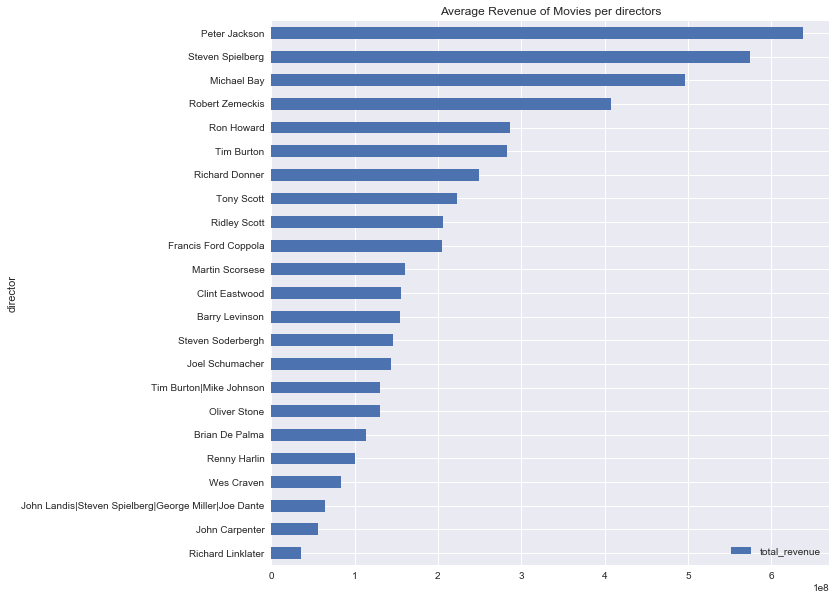

In [138]:
df_topDirectorsRevenue.plot(kind='barh', figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per directors' );

In [223]:
#one might want to fiddle with the data and use a pie chart
#df_topDirectorsRevenue[:3].plot(kind='pie', subplots=True, figsize=(10, 10), sort_columns='True', title='Average Revenue of Movies per directors', legend=False );

The bar chart above shows that directors who have directed a total of 18 movies. We can infer that the movies directed by the topmost directors from Peter Jackson to Tim Burton tend to have a greater revenue. Lets further investigate if this inference hold any crediblity by looking into the details of the top director - Peter Jackson 

In [224]:
#Extract rows containing movies directed by Barray Levinson
Peter_Jackson=df_topDirectors[df_topDirectors['director'].str.contains('Peter Jackson')].sort_values(by='total_revenue', ascending=0)

In [225]:
Peter_Jackson[['id', 'director', 'original_title' ,'total_revenue']]

id       director                                     original_title  \
295     122  Peter Jackson      The Lord of the Rings: The Return of the King   
292     121  Peter Jackson              The Lord of the Rings: The Two Towers   
291     120  Peter Jackson  The Lord of the Rings: The Fellowship of the Ring   
294   49051  Peter Jackson                  The Hobbit: An Unexpected Journey   
296   57158  Peter Jackson                The Hobbit: The Desolation of Smaug   
289  122917  Peter Jackson          The Hobbit: The Battle of the Five Armies   
297     254  Peter Jackson                                          King Kong   
290    7980  Peter Jackson                                   The Lovely Bones   
299   10779  Peter Jackson                                    The Frighteners   
293    1024  Peter Jackson                                 Heavenly Creatures   
298     763  Peter Jackson                                          Braindead   

     total_revenue  
295   1.326278e+09  
292   1.122902e+09  
291   1.073080e+09  
294   9.658933e+08  
296   8.970944e+08  
289   8.797523e+08  
297   6.141098e+08  
290   9.505945e+07  
299   4.081567e+07  
293   4.485618e+06  
298   3.770420e+05

Lets have a look at the data in graphical format aswell

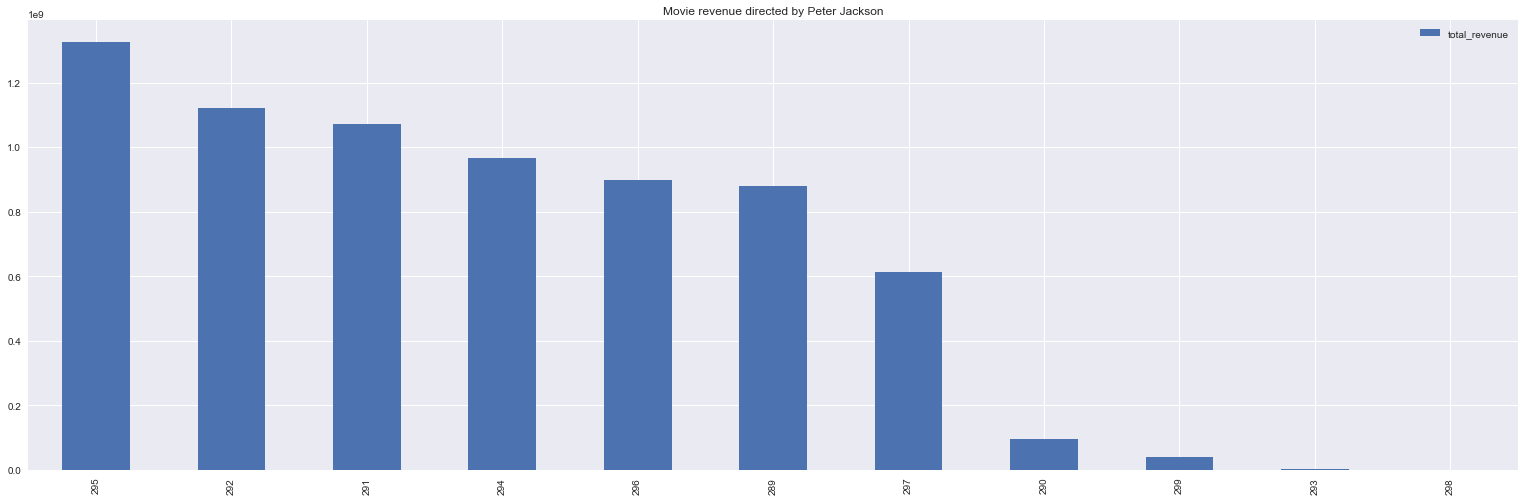

In [226]:
Peter_Jackson[['total_revenue']].plot(kind='bar', sort_columns='True', title='Movie revenue directed by Peter Jackson');

Lets also have a look at the movies directed by Stevin Speilburg before making some conclusions

In [227]:
#Extract rows containing movies directed by Steven Spielburg
StevenSp=df_topDirectors[df_topDirectors['director'].str.contains('Steven Spielberg')].sort_values(by='total_revenue', ascending=0)

In [228]:
#StevenSp[['id', 'director', 'original_title' ,'total_revenue']]

Lets have a look at the data in graphical format aswell

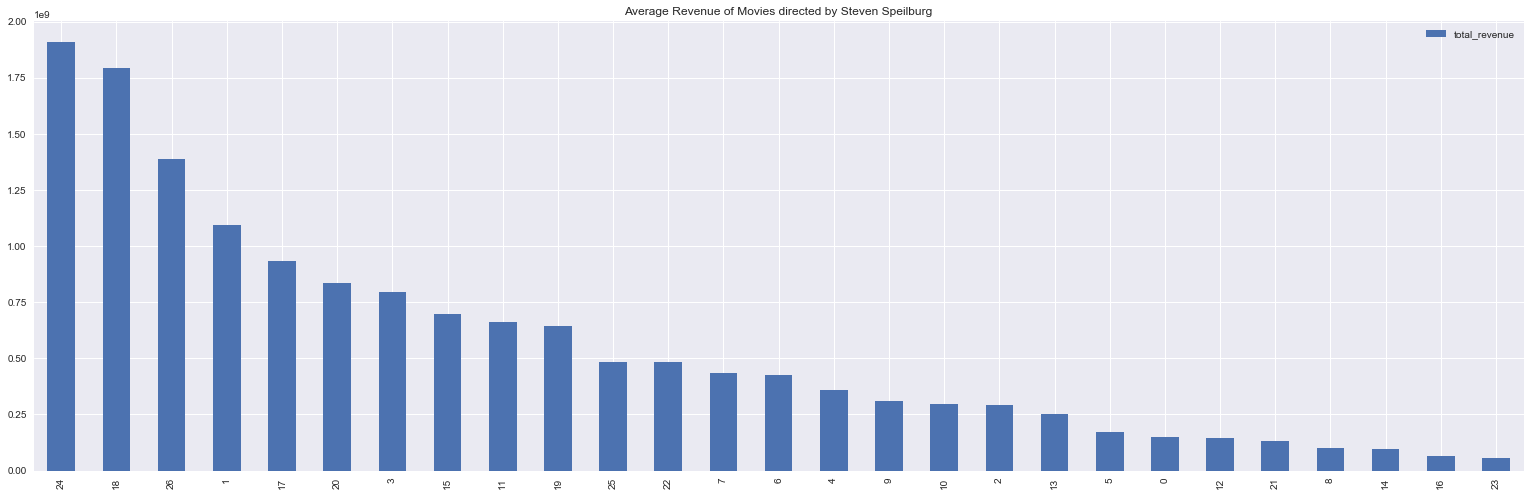

In [229]:
StevenSp[['total_revenue']].plot(kind='bar', sort_columns='True', title='Average Revenue of Movies directed by Steven Speilburg');

Having evaluated our findings from the above dataset(tables and graphs), <b> there isn't substancial evidence to suggest that the movies produced by such directors would generate high revenue as these table show that while some movies did produced a marked high revenue well above the global mean revenue, there were significant other movies that did not perform as well. <b>

Next we shall see the trends in revenue over the years. 

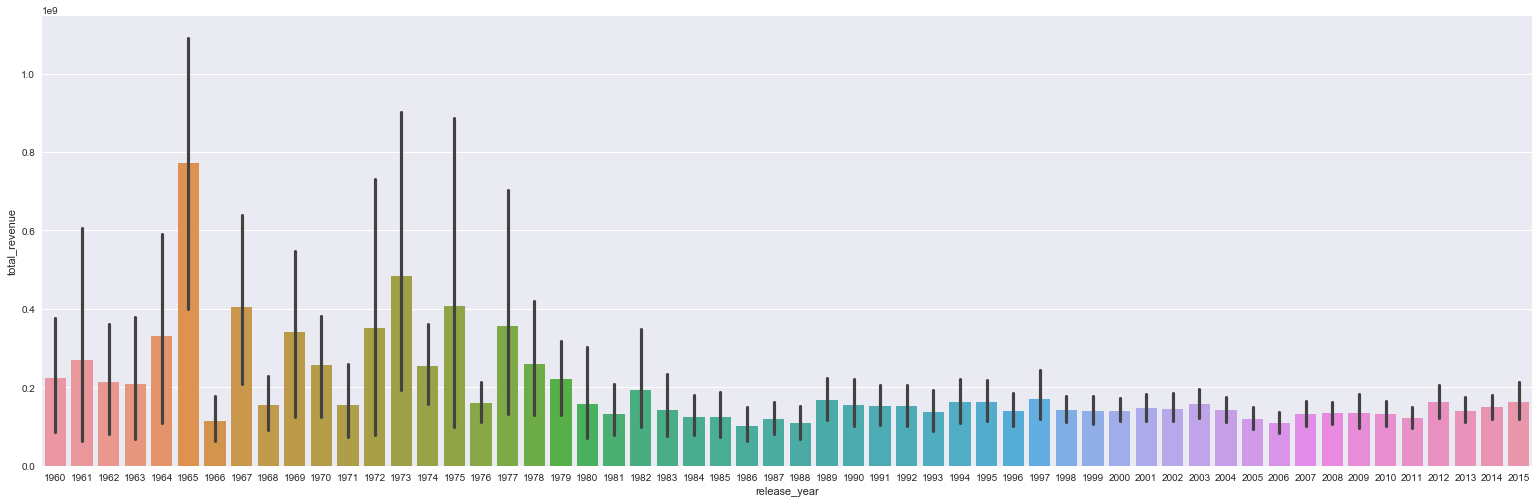

In [230]:

sns.set(rc={'figure.figsize':(26.7,8.27)})
sns.barplot(x="release_year", y="total_revenue", data=df_q2);

In [233]:
df_q2['total_revenue'].mean()

148448631.16558233

<b>The above graph shows that the revenue(with fluctuations) was higher from the 60's to the 70's while it remained almost the same and consistant with minor fluctuations after the 90's</b> However, it must also be noted that the during the data cleaning process alot of missing data was from 1960s to 1980, and when cleaned only few data remained which contained the revenue of the movies. This does make one consider the crediblity of this result. 

So considering our inital question that 'Are there any features/properties in the data which are correlated to or effect revenue?'
<br> 
We find that
- There is a positive correlation between budget and revenue. Movies with a higher budget tend to generate a higher revenue. However considering the fact that we lost 50% of our dataset due to null values, one might question the crediblity of this inference.
- There is also a correlation between popularity and revenue. 
- There isn't substancial evidence to suggest that the movies produced by popular directors would generate high revenue <br>
> However we did discover that Steven Spielberg and Peter Jackason have directed a marked greater number of movies than the rest.
- Between the early 60's to 70's, we see a fluctuation with the movie revenue, averaging with a marked greated revenue than seen after the 80s. As the years have progressed into the 80's, the revenue generated by movies have remained steady. The limitation of this observation is the fact that there is a few data avaliable for the years of 1960s to 70s hence the reliablity of the observation can be questioned.

<b> We can also see our conclusion summerized in the below correlation matrix created </b>

In [156]:
revenue_corr = df_q2.copy(deep=True)
# create a correlation matrix
revenue_corr=df_q2.copy(deep=True)
revenue_corr['total_revenue'] = revenue_corr['total_revenue'].astype(str).astype('float64')
revenue_corr['total_budget'] = revenue_corr['total_budget'].astype(str).astype('float64')
revenue_corr.drop(columns=['id'], inplace=True)
revenue_corr =revenue_corr.corr()

<Figure size 936x936 with 0 Axes>

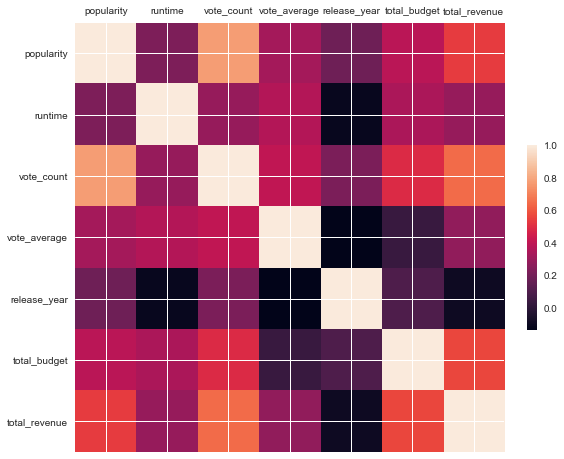

In [159]:
# Plot the matrix using following configerations

plt.figure(figsize=(13,13))
revenue_corr_1=plt.matshow(revenue_corr,fignum=4)
plt.xticks(range(len(revenue_corr.columns)),revenue_corr.columns)
plt.yticks(range(len(revenue_corr.columns)),revenue_corr.columns)
plt.colorbar(revenue_corr_1,fraction=0.02)
plt.show();

High Postive correlation between 
- Popularity and vote count
- Popularity and total revenue
- Vote count and total revenue 

Low correlation between
- Release year and vote average
- Runtime and release year
- Release year and revenue 

<hr>

### Question 2 - Exploring trends. 

>Now having explored the relation between revenue and various other features. We shall explore more and see whether there are other trends present in the data.

<b> Q2 - a) </b> Which genres are the have the most popular genres over the years? How can I see these trends in the movies. 
<br>
I have decided to use pie charts to describe the trends of the movies over the years. 

In [160]:
#create new dataframe for this question.
df_q1 = df.copy(deep=True)

Cleaning the dataset according to requirments and only keeping those coloumns that are actually needed. 

In [161]:
df_q1.drop(df_q1.columns.difference(['popularity', 'original_title','genres','release_year']), 1, inplace=True)

# Splitting the various genres using the delimeter 
df_q1.genres = df_q1.genres.str.split('|')

The below function <b> explode </b> that I have used is taken from stackoverflow. Which allows me to seperate the various movie rows according to their multiple genres. So for example if I have a movie which is of action and drama genre. This function would allow me to split the row into 2 rows each having a single genre of 'drama' and 'action'

In [162]:
def explode(df, lst_cols, fill_value=''):
    # make sure `lst_cols` is a list
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)

    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()

    if (lens > 0).all():
        # ALL lists in cells aren't empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        # at least one list in cells is empty
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [163]:
#Dropping null values and calling the explode function
df_q1.dropna(inplace = True);
df_q1 = explode(df_q1, ['genres'])
# What are the most popular genres 


Having extrated primenalry results, we can now visualize which genre had the most movies over all the years. The below code and the subsequent graph does just that. 

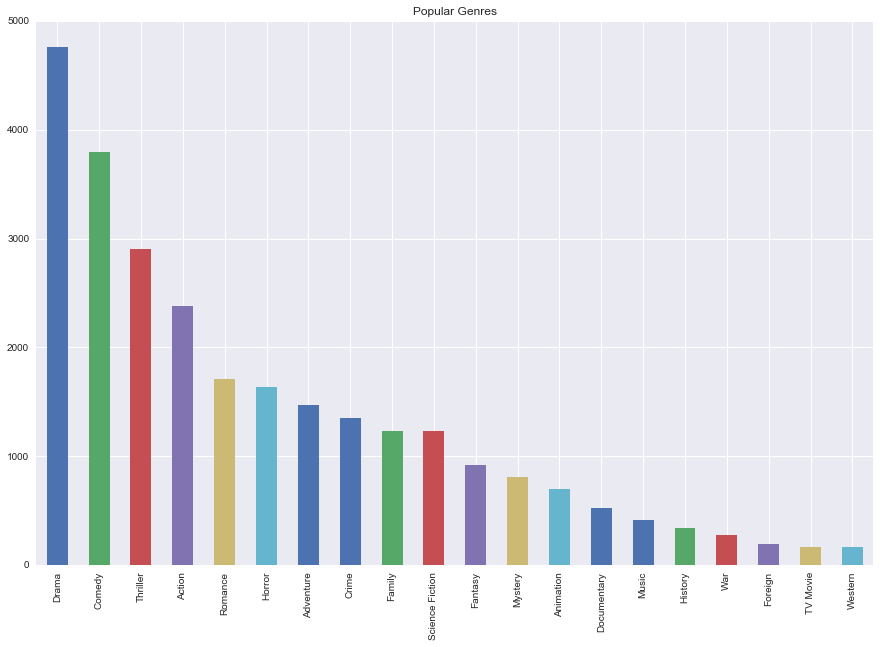

In [182]:
popular_genres = df_q1['genres'].value_counts()
popular_genres.plot('bar', figsize=(15,10), sort_columns='True', title='Popular Genres');

While the above graph does do a good job in explaning the overall trend of the genres popularity by summerizing the dataset, it does not show us the trends over the years where we can individually deduce and see which genre was most popular in one year and whether its popularity increased or decreased in the next or previous years. This year by year analysis cannot be done by the above bar chart therefore I decide to use pie charts which would enable us to indivually see genre trends over all the years. 

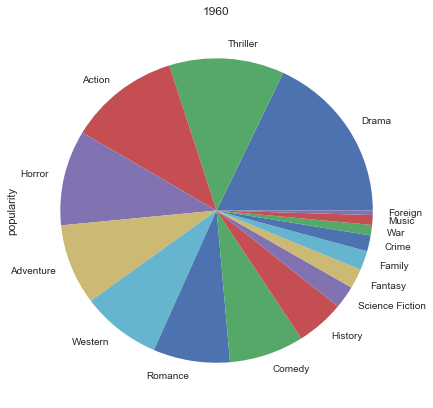

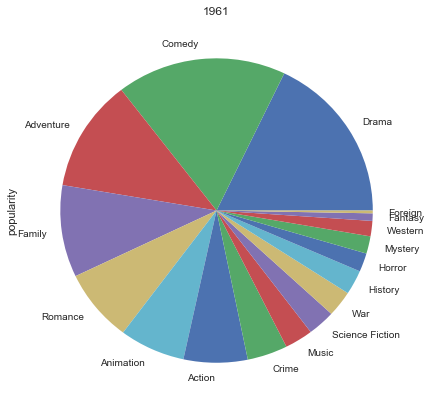

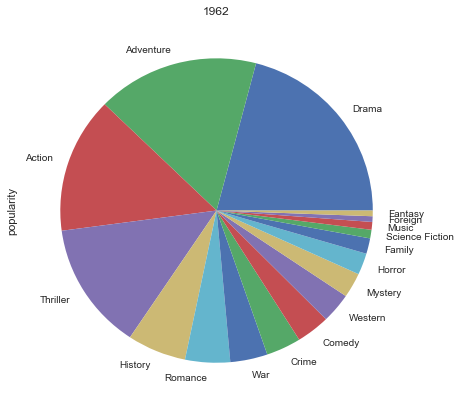

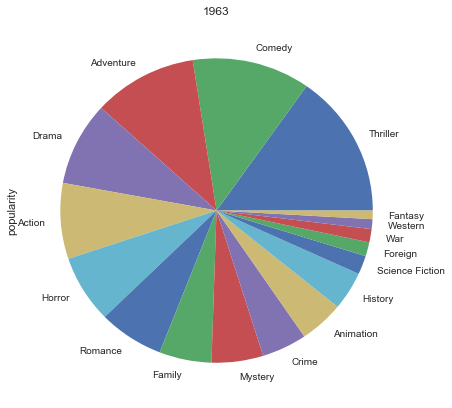

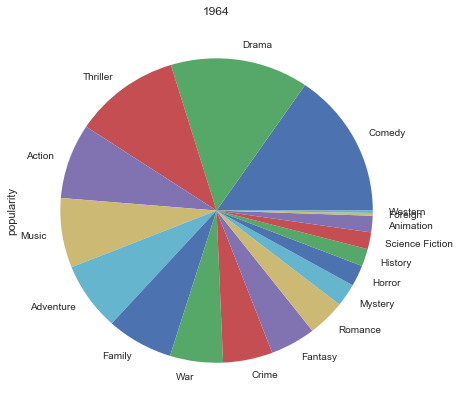

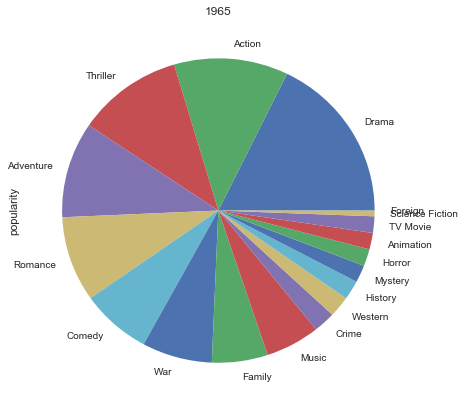

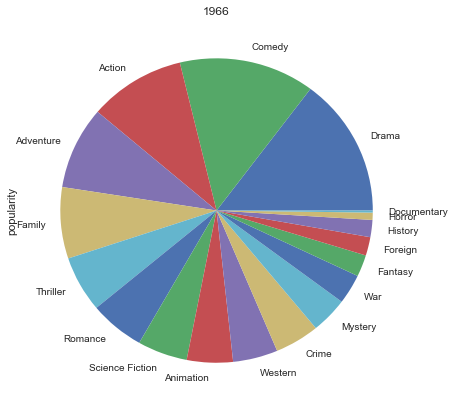

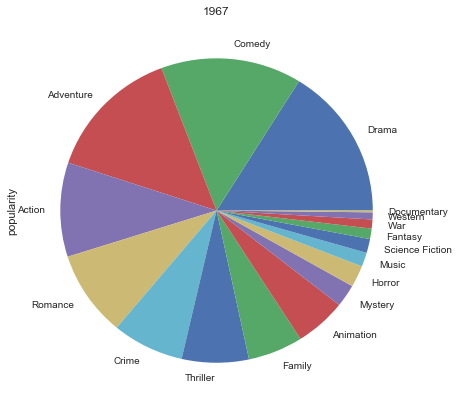

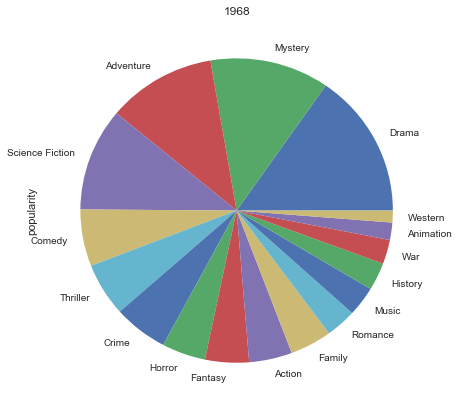

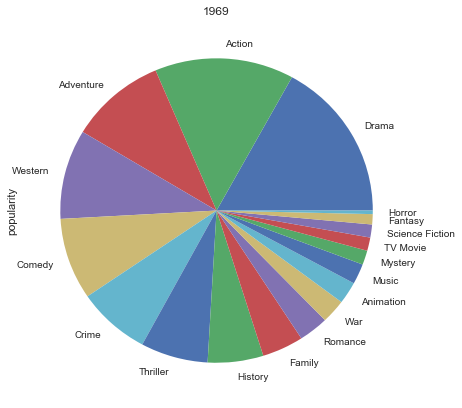

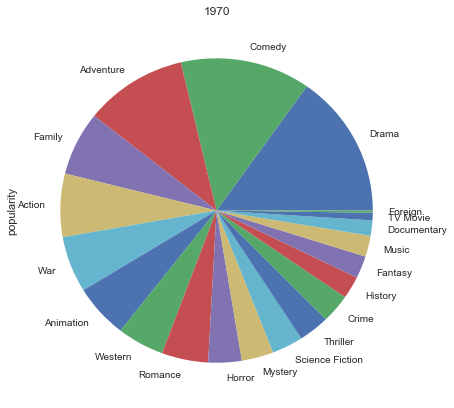

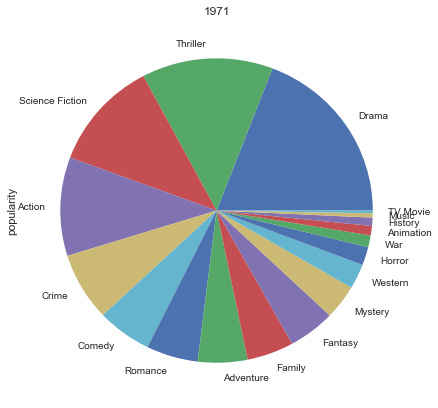

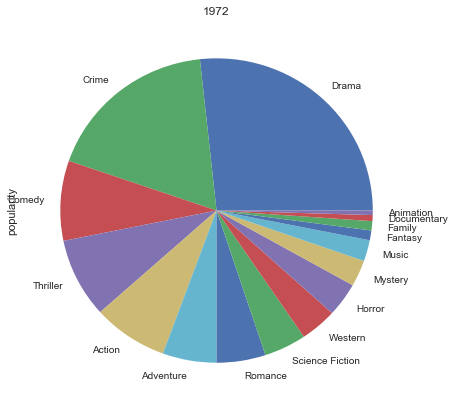

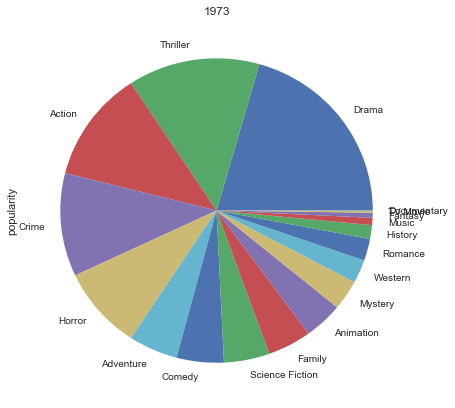

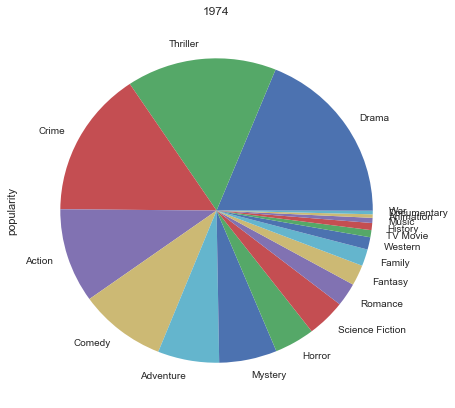

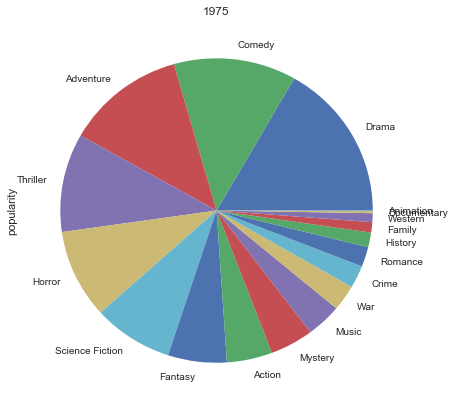

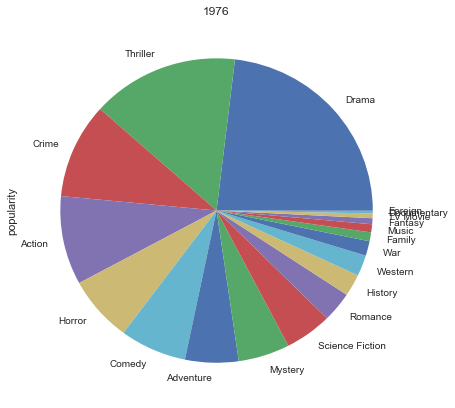

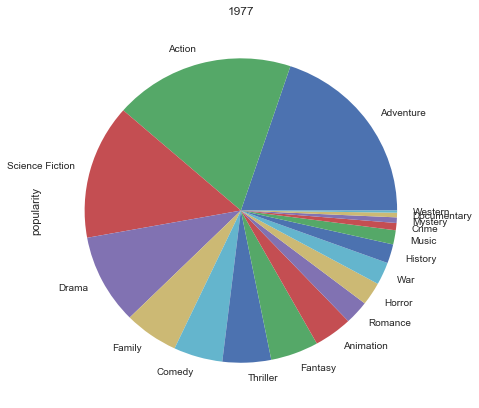

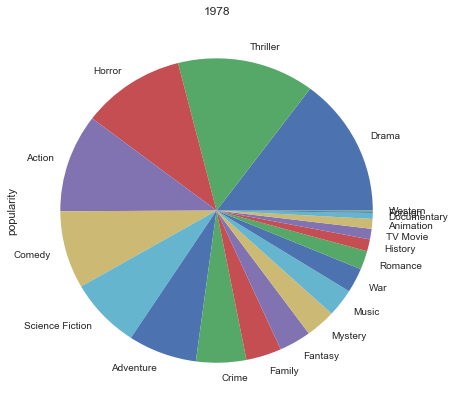

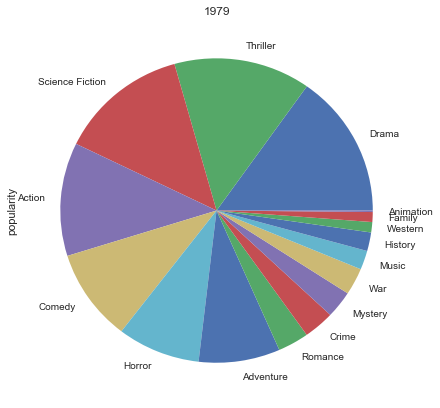

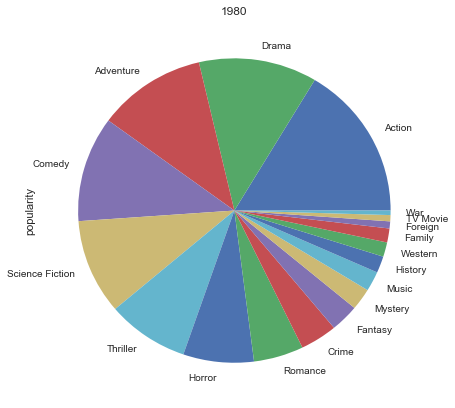

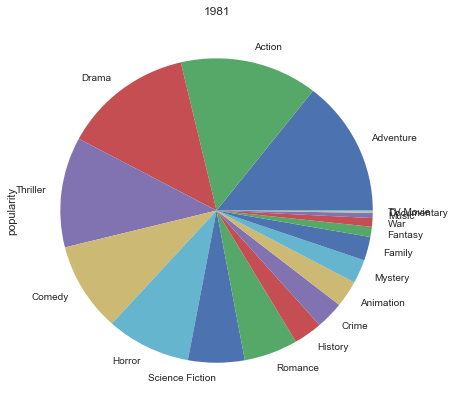

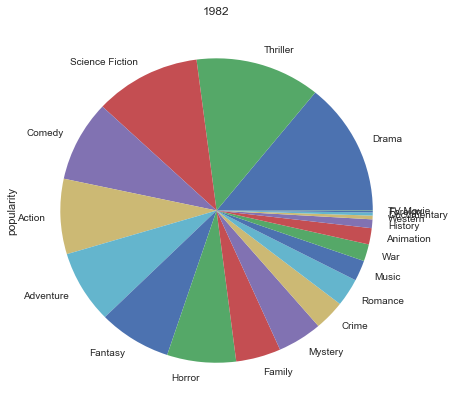

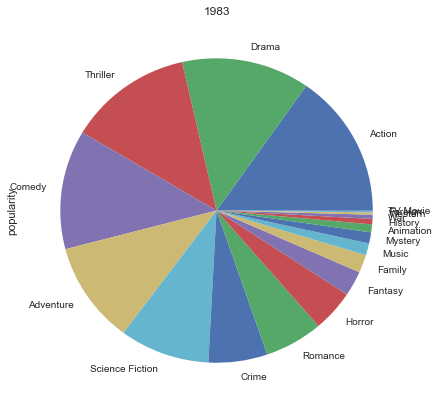

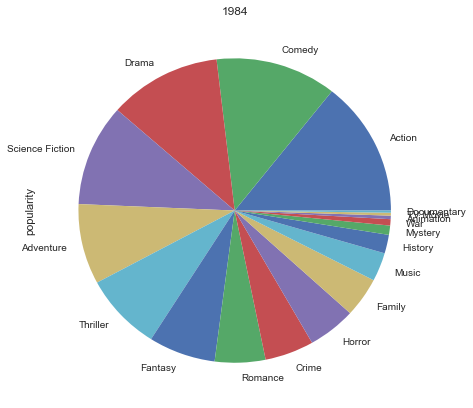

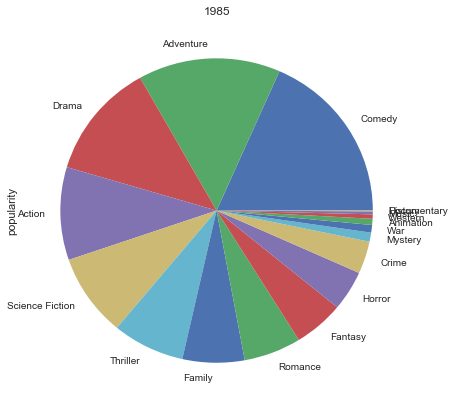

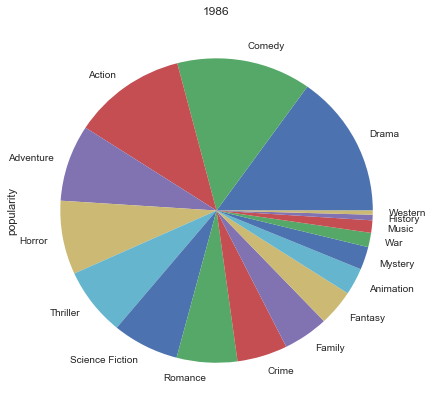

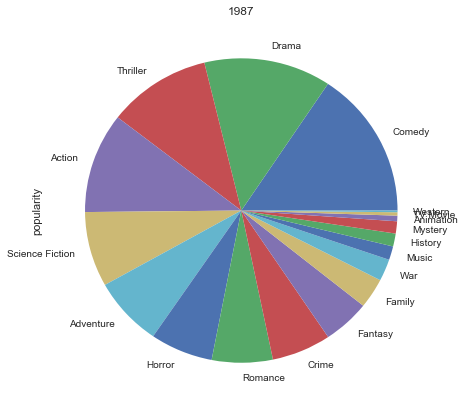

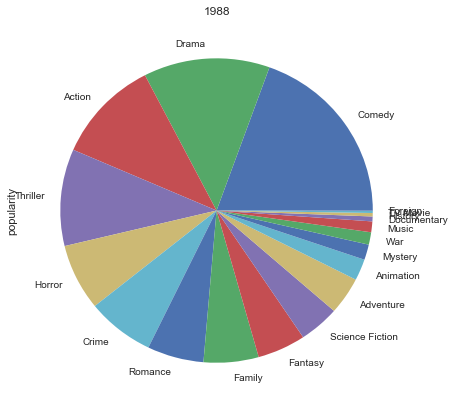

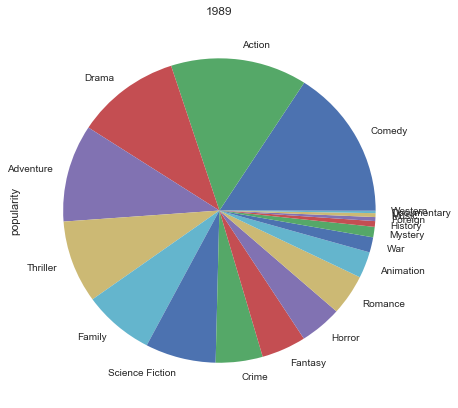

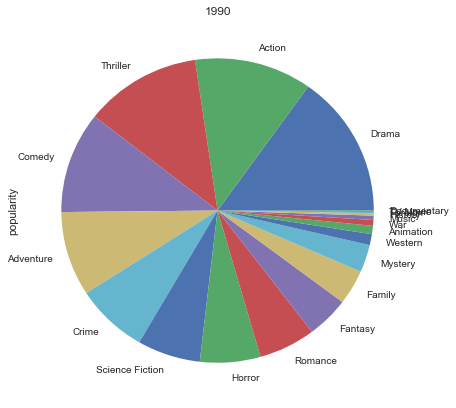

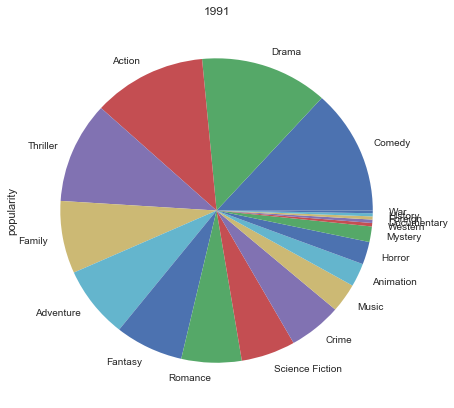

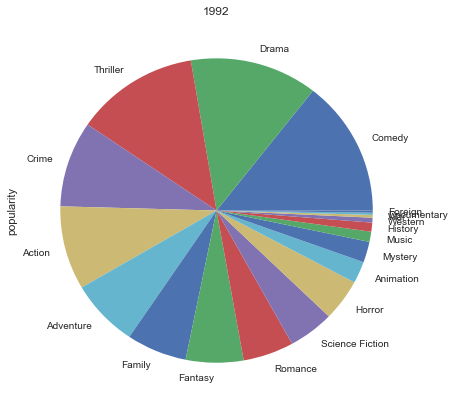

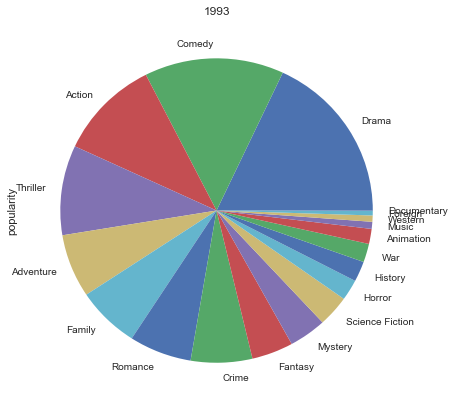

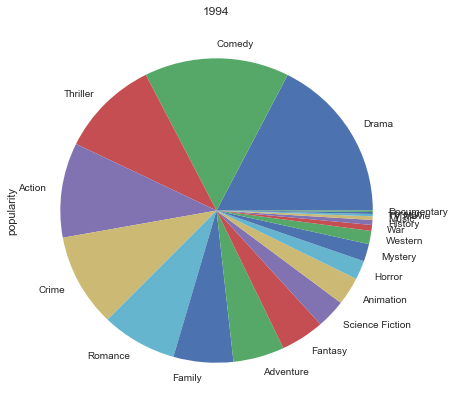

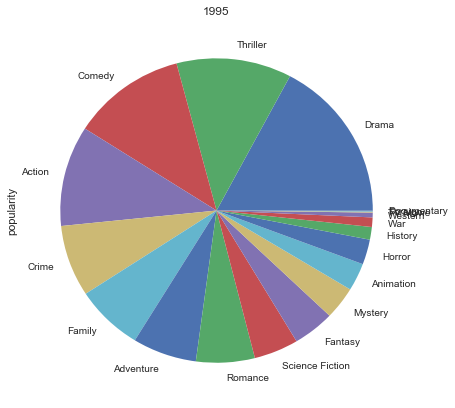

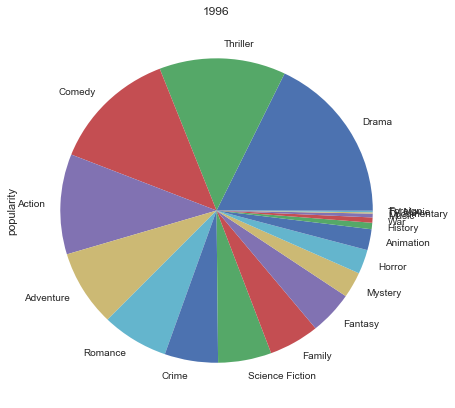

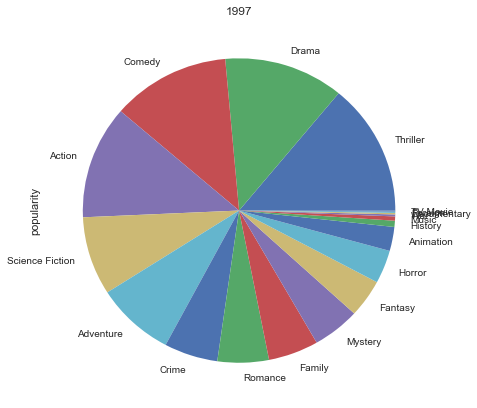

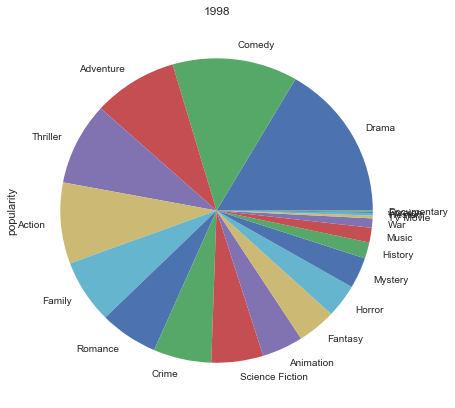

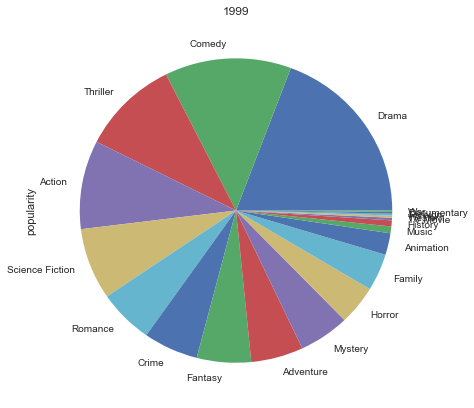

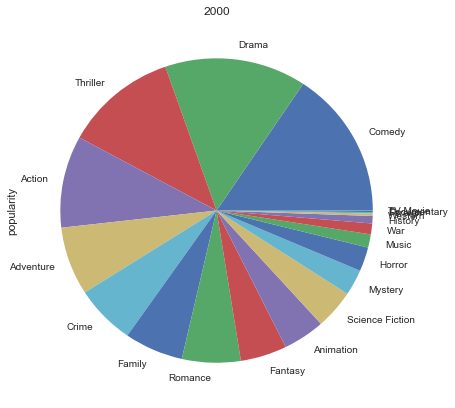

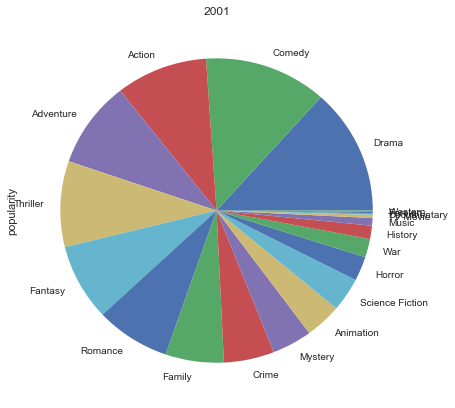

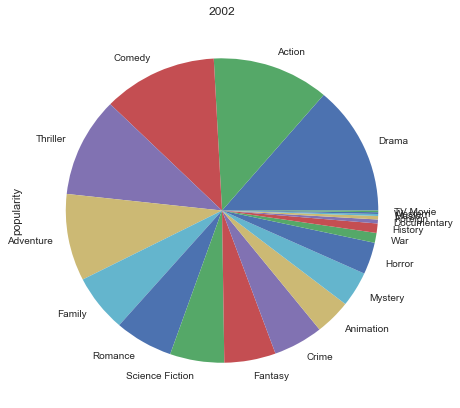

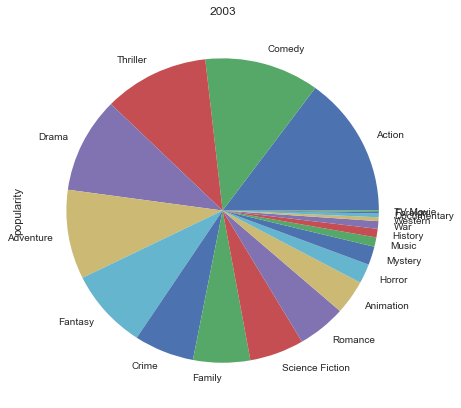

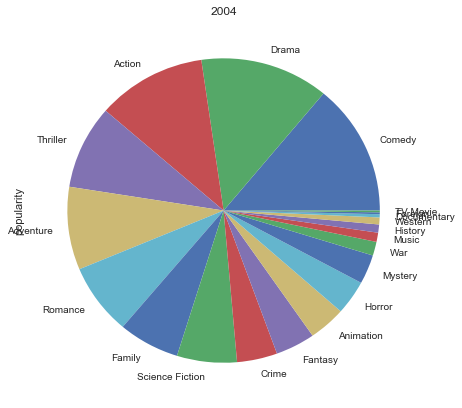

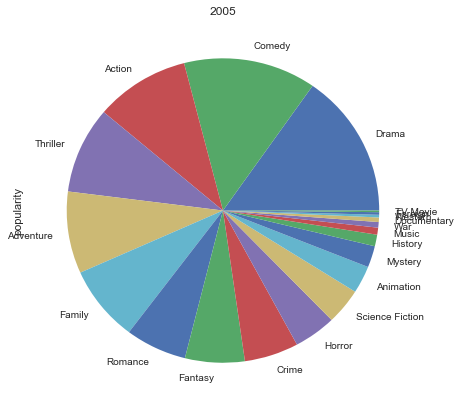

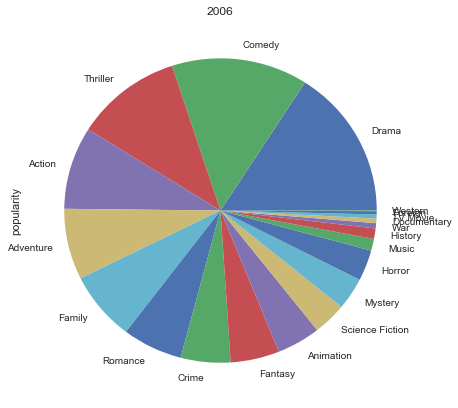

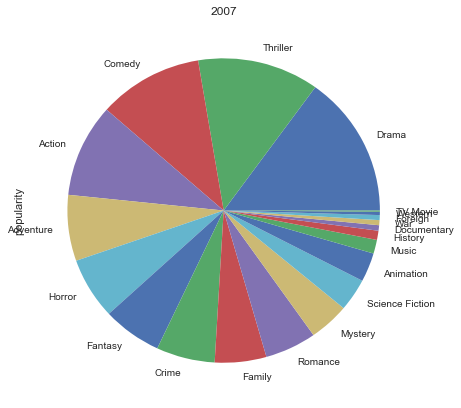

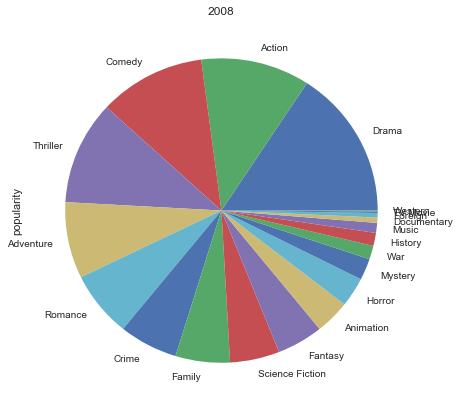

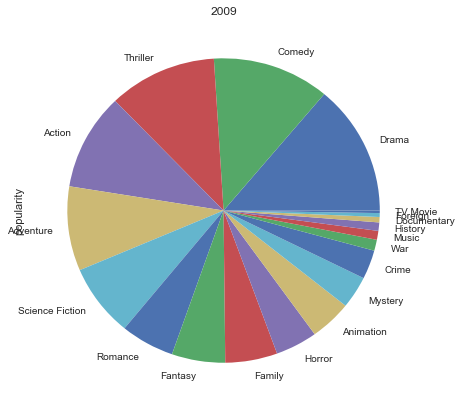

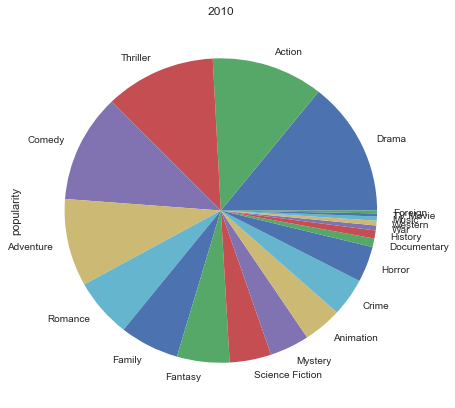

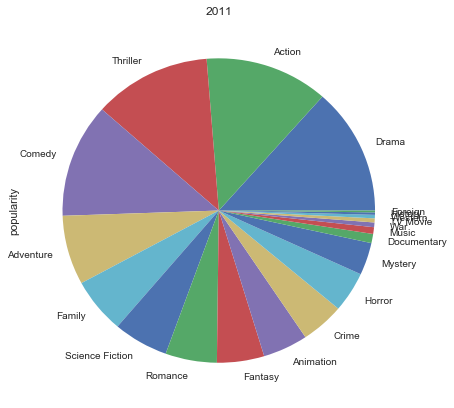

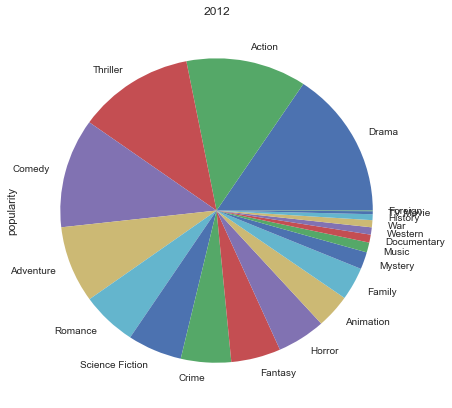

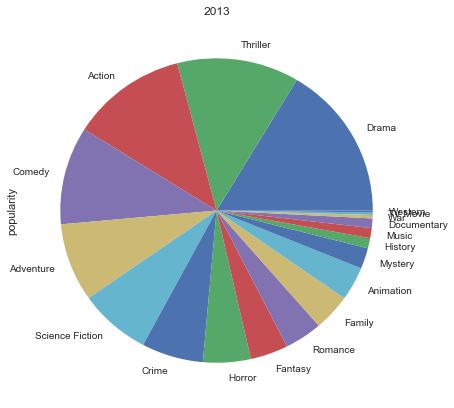

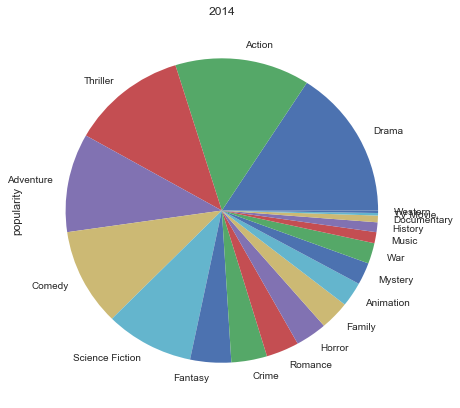

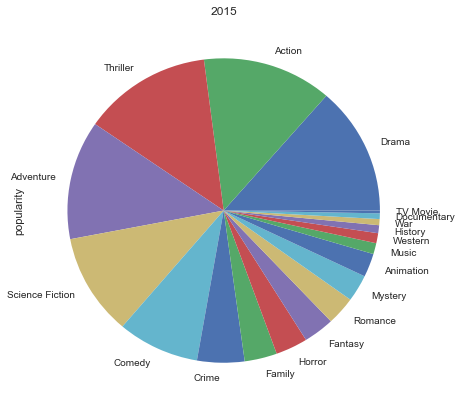

In [234]:
# We first extract all the years present in the dataframe and sort them. 
years = df_q1['release_year'].unique()
years.sort()
# We then loop over these subsequent years and extract the movies from that particular year and group them by 
# their popularity(sum). We then plot each using a pie chart. 
for i in years:
    genre_popularity = df_q1[df_q1['release_year'] == i]
    genre_popularity = (genre_popularity.groupby('genres')['popularity'].sum()).sort_values(ascending=False)
    genre_popularity.plot(kind='pie', figsize=(7,7));
    plt.title(i)
    plt.show()

Q2 - b) Lets make another observation regarding voter count, the vote average and how it has changed over the years. 

In [235]:
df_q3 = df.copy(deep=True)
df_q3 =df_q3.drop(df_q3.columns.difference(['vote_count','vote_average','release_year']), 1)

In [236]:
votes =(df_q3.groupby('release_year', sort=True).mean())
#y = df_q3.groupby('genres')['popularity'].sum()

In [237]:
votes.head(4)

vote_count  vote_average
release_year                          
1960           77.531250      6.325000
1961           77.580645      6.374194
1962           74.750000      6.343750
1963           82.823529      6.329412

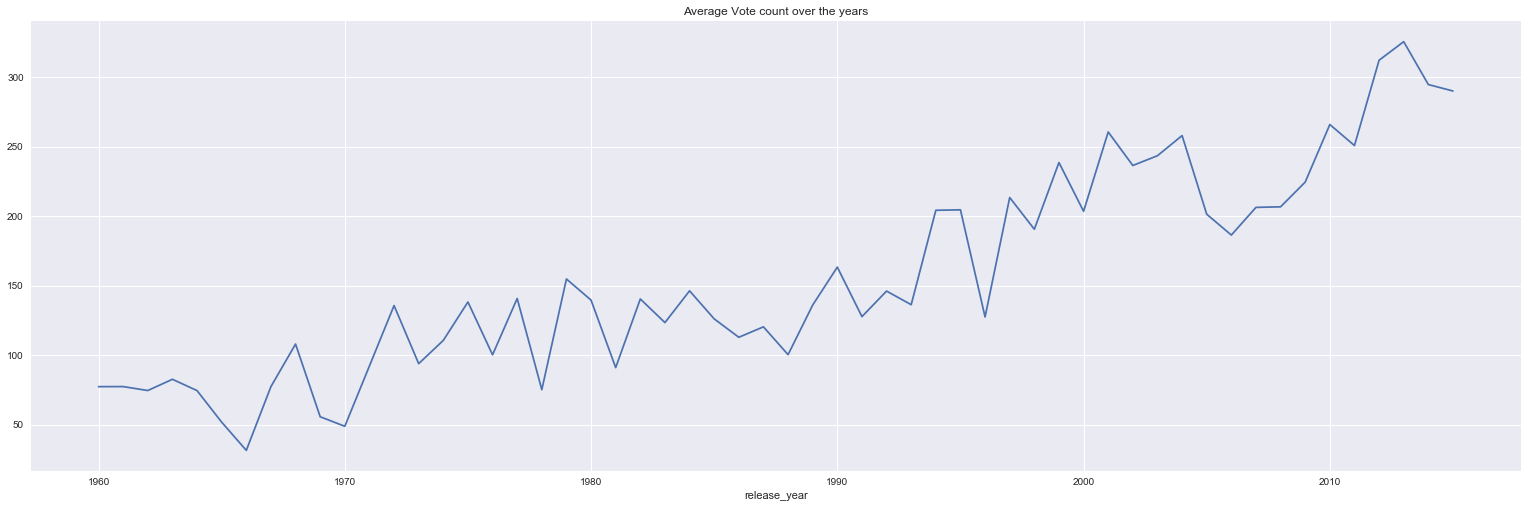

In [238]:
votes['vote_count'].plot(title='Average Vote count over the years');


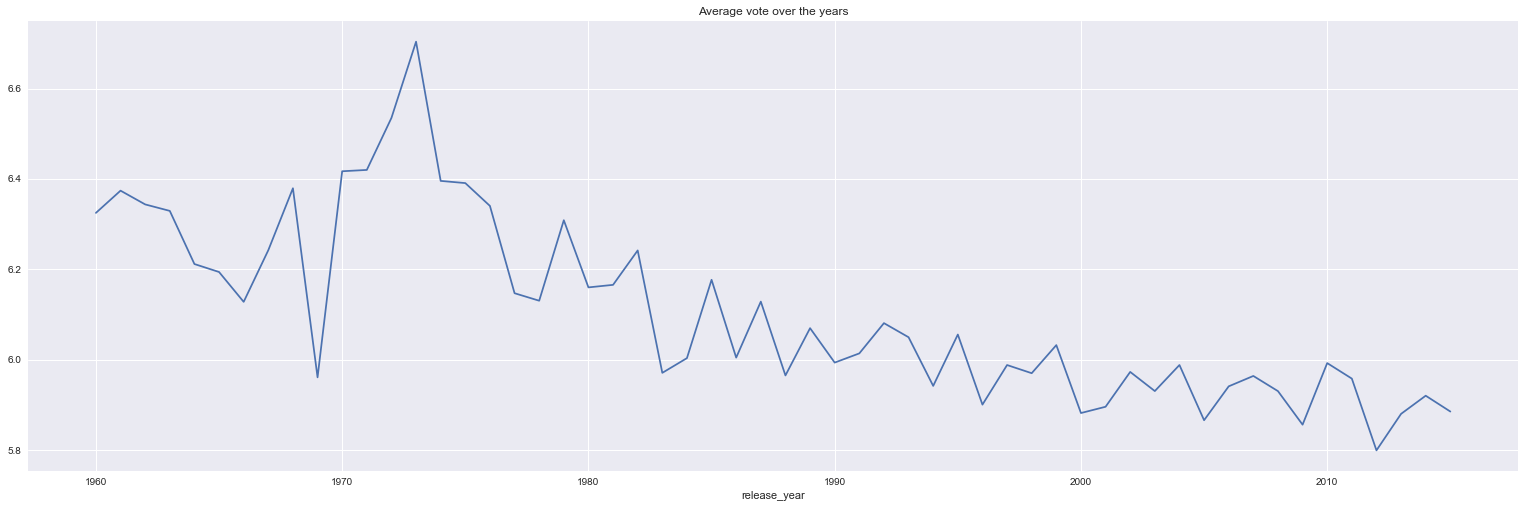

In [239]:
votes['vote_average'].plot( title='Average vote over the years');

We note that the vote average count has increased steadily over the years however the vote average has only seen a spike in the mid 70s after which there was a decline(albiet with myraid fluctuations). 

<a id='conclusions'></a>
## Conclusions


<b>Limitations: </b> <br>
- A dataset of 10,000 uncleaned records is not enough by itself to discover trends within data. Considering the fact that we shall be cleaning the data and removing null values, the size of the data would reduce signifcantly. 
An example of this in particular is the 'revenue_adj' and the 'budget_adj' coloumns where almost 50% of the coloum values contain zero values. This large number of missing values dissables us to scale the values, or compute the local average and fill these values as they would reduce the reliablity of the dataset. 

Hence the biggest limitation of this dataset is the fact that that it contains a limited number of values and any conclusion that will be drawm would lack reliablity since the underlaying data is limited. 

The second limitation in this IMDB dataset is the fact that there is also noise in the data. While I have been able to in various occasions remove outliers. This was always not possible considering the limited skill set I have. 

<b>Conclusions: </b>
While I have given my conclusions of the various features, the dataset itself and any correlations on various occassions in the study. I shall summerize my findings below. 

To anwser the signifcant question we asked in the beginning of our analyis that 'What features in the data are correlated to or effect the revenue of the movie?' 
We find that:
- That there is a significant correlation between the movie budget and revenue. The data suggests that on avearge, movies with a higher bugdget tend to perform better than those with a lower budget. However, the signifcant limitation when coming to a reliable conclusion was the lack of data we had. After cleaning the coloumsn of zero values we were left with half of the orignial values. That couploed with the fact that there were a significantly higher amount of missing values of the movies present in the early 50 to 70s. 

- Popularity and revenue are also correlated. This seems an almost predictable conclusion considering that a popularity of a movie generally tends to produce a higher revenue. We now have data to support this inference. 

- The movies directed by directors Peter Jackson, Steven Spielberg and Micheal Bay on average have a marked higher revenue than the remaining directors. It is also interesting to note that Peter Jackson though has directed a sizable number of movies, still has directed less than the top 15. <b> This goes to suggest that he appears to a competent director </b>. <br>

This however is not enough to come to a definite conclusion that all famous directors(or those who have directed a sizable number of movies) generate the highest revenue. Even though the data does show a relationship between top directors producing more revenues for a movie than other directors. 

- The trends of revenue earned by the movies over the years show a certain spike in the mid 1960s to 1980s, however dropped to around 200 M and remained almost on average the same from the 1980s too the 2000s. This observation is not very credible as there were a lot of missing values in the data from 1960s to 1980s. 

As mentioned numerous times earliers, any inference/observation which also takes in consideration the movie revenue is not very reliable considering the lower number of data. 

<b> Exploring trends within the data </b>

The following trends were found in the data:
- Drama and Comedy are the most popular movie genres in total. 
- Voter count on average has increased significantly over the years though the average vote has seen a gradual decline after the mid 1970s. 
- The top diretors which directed the most movies include Spielberg, Clint Eastwood and Ridley Scott have directed a marked more number of movies than other directors. However Peter Jackson seems to have generated the most revenue which <b> fun fact</b> seems plausible since he directed the infamous 'Lord of the Rings' movie trilogy among signifant others. 

<b>Reference:</b><br> 
1)Please note that the 'explode' function used to seperate the movie genres from the genre coloumns was taken from the following stackoverflow question <br>
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
<br>
2) I also drew inspiratin from the following Kaggle analysis. It was interesting to note that the original dataset contains far more features and the limitless possiblities of data wrangling that can be done. <br>
https://www.kaggle.com/aninda123/imdb-movie-analysis
<hr>